In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

MAX = 256

class CvImage:
    def __init__(self, name = None, image = None):
        self.image = cv2.imread(name, cv2.IMREAD_COLOR) if image is None else image
        self.__name = name

    def __str__(self):
        return self.__name
    
    def cvtColor(self, color):
        return CvImage(name = self.__name, image = cv2.cvtColor(self.image, color))

def readImage(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray') -> None:
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)

def plothist(hist, color, title = 'Default') -> None:
    ax = plt.subplots()[1]
    ax.title.set_text(title)
    ax.plot(hist, color)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)
    
    plt.tight_layout()

def showImageList(lista, cmap = 'viridis'):
    for item in lista:
        showImage(item, cmap)

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()

def plotHistograma(image, max = 256):        
    plt.xlabel('Tom de cinza')
    plt.ylabel('Probabilidade')

    plt.bar(range(max), image)
    plt.show()

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


/tmp/ipykernel_154613/1202592498.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axs = plt.subplots(nrows=1, ncols=len(images))


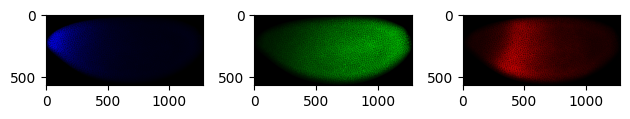

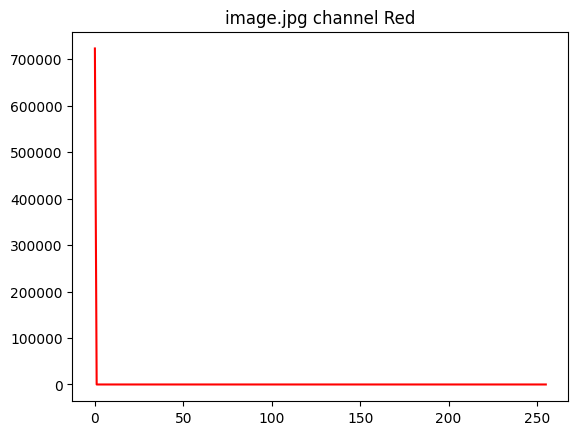

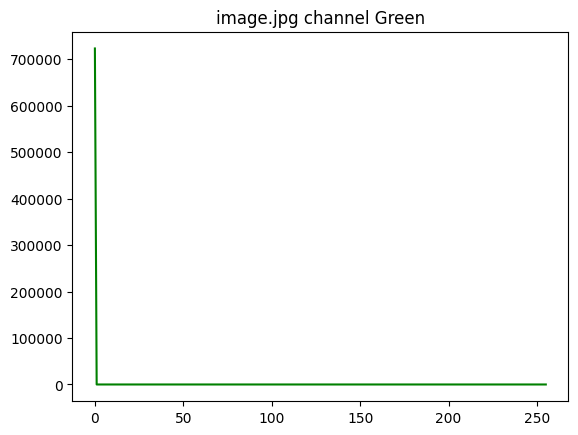

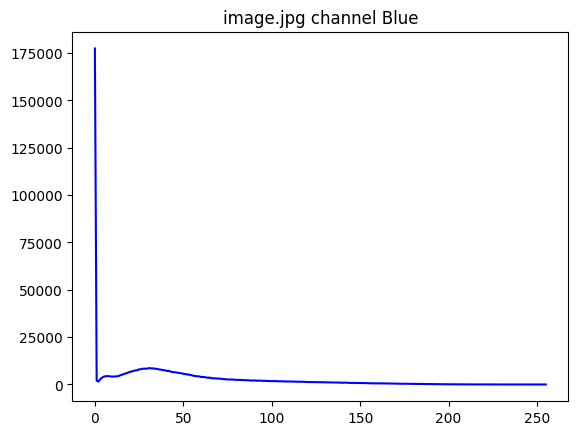

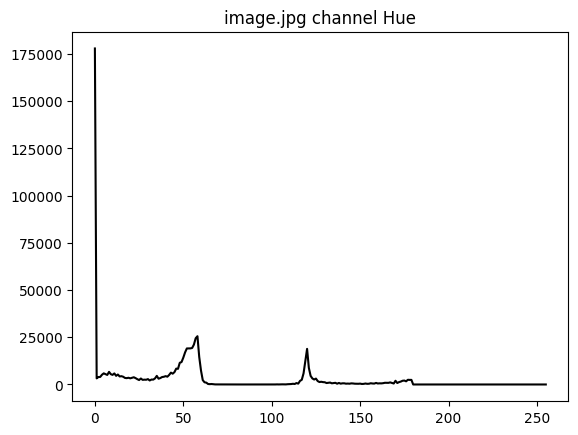

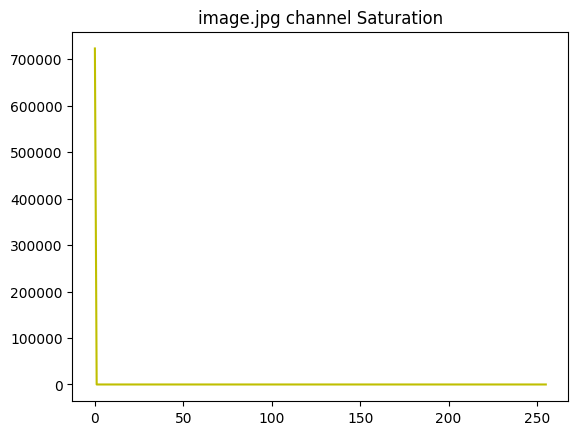

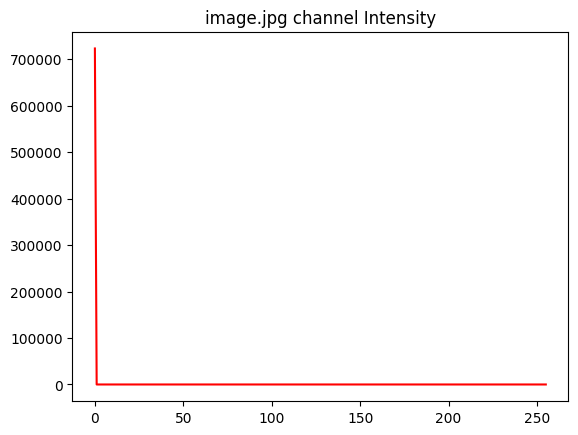

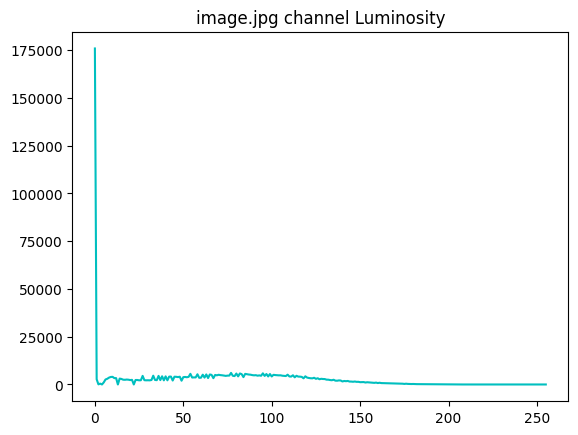

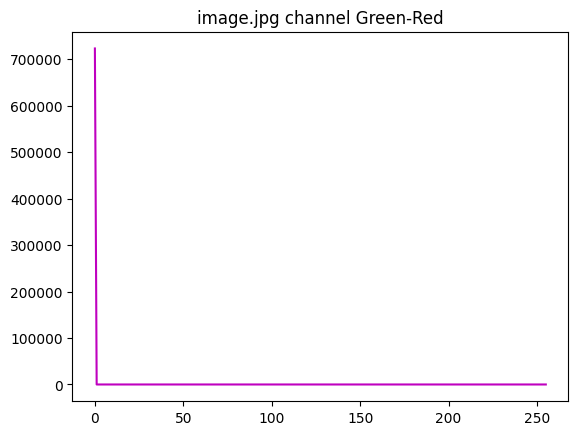

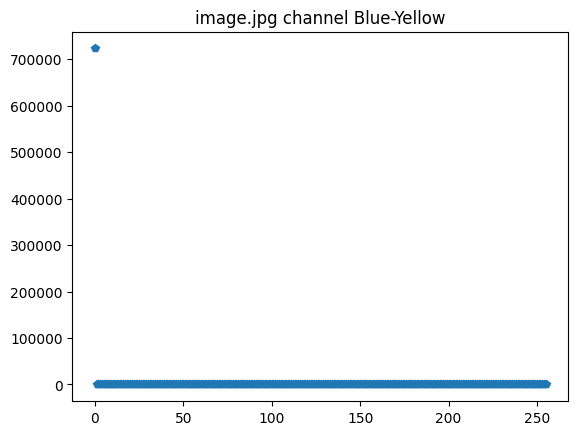

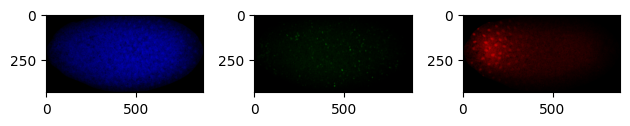

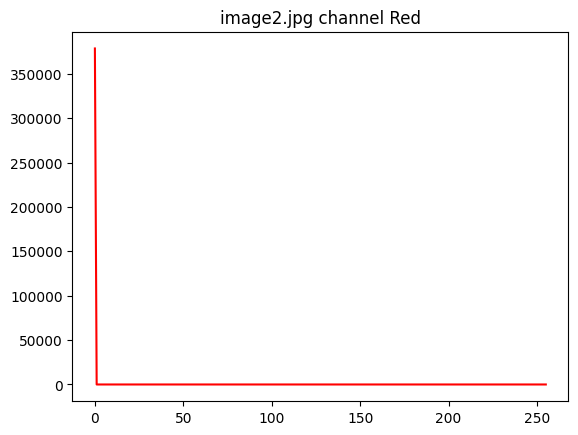

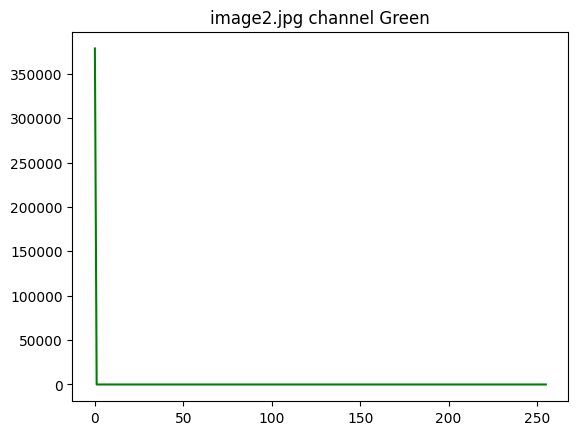

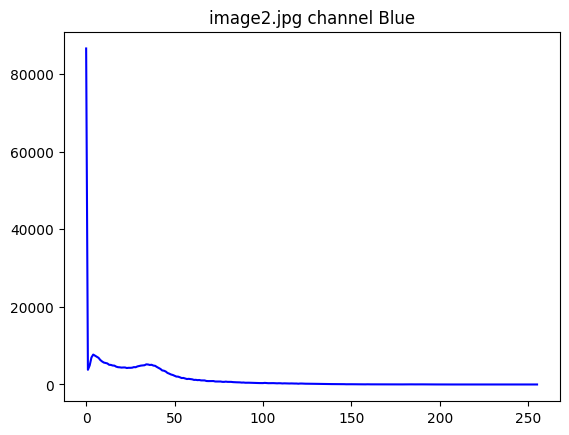

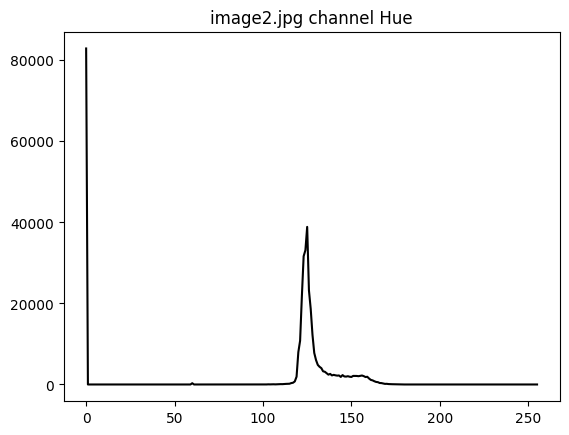

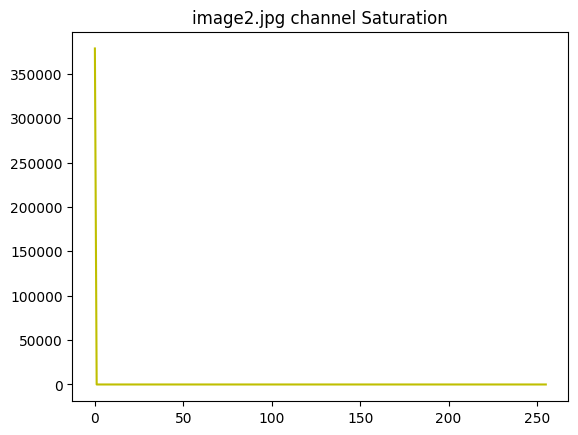

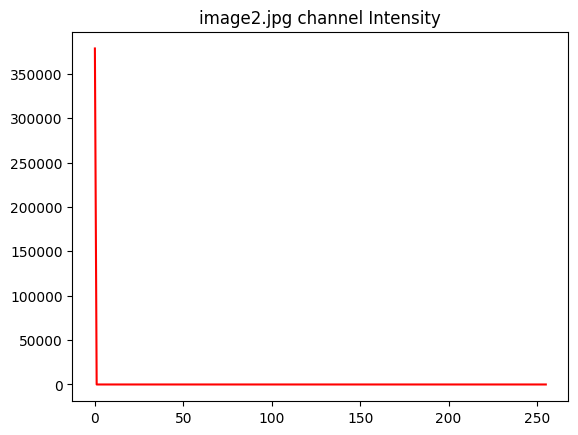

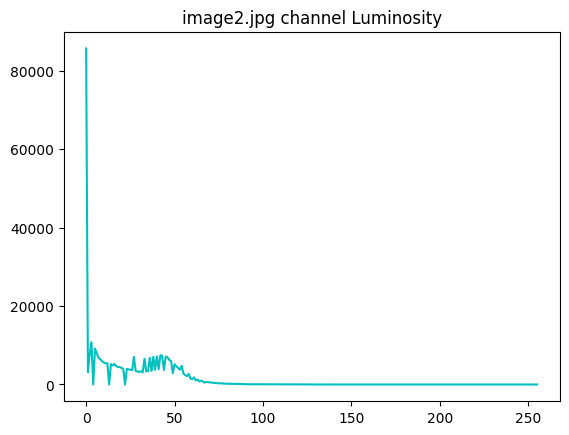

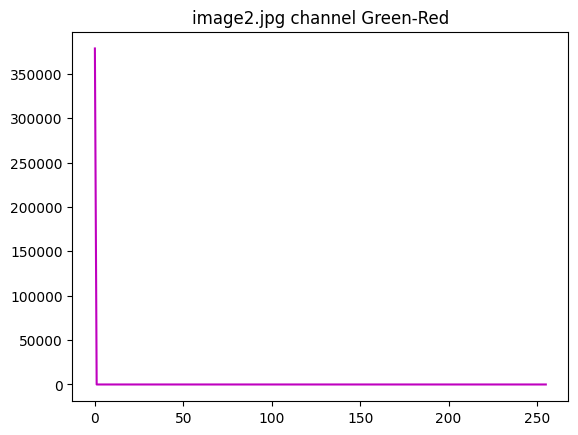

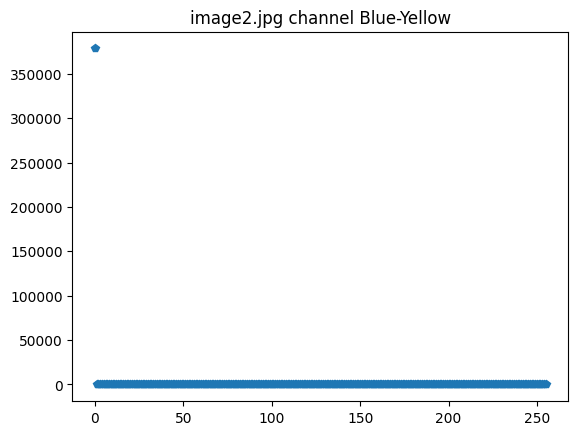

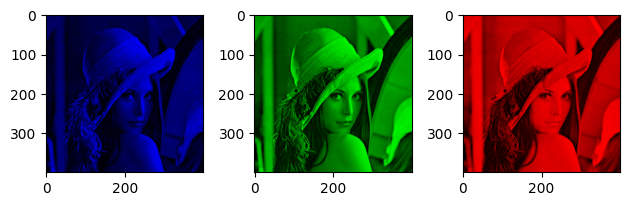

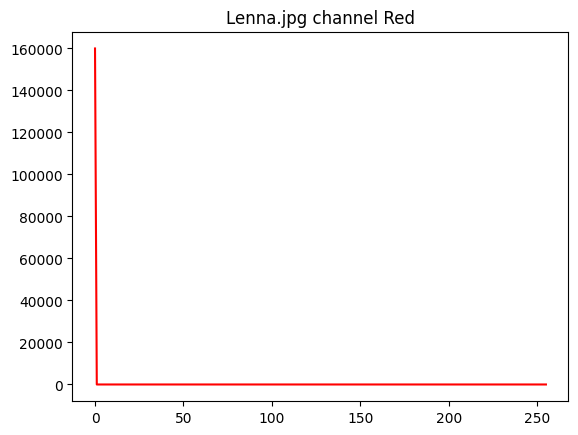

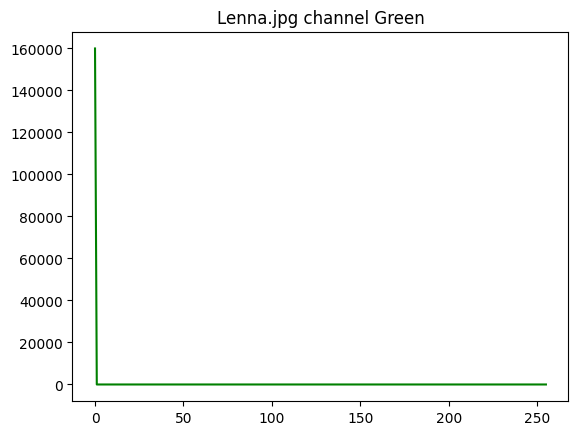

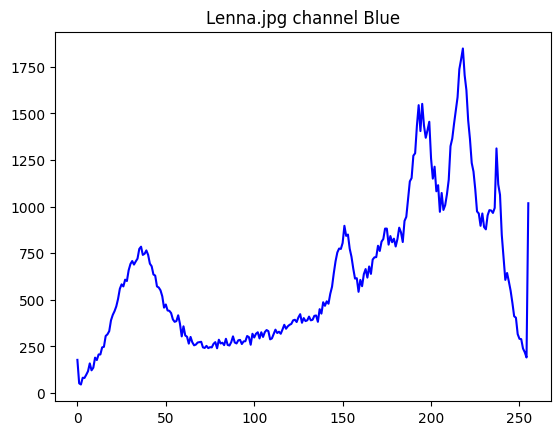

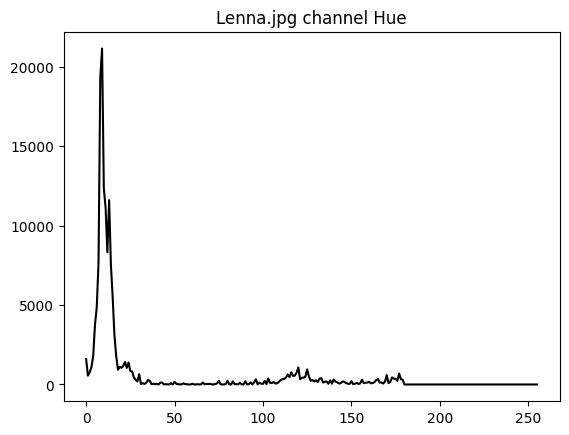

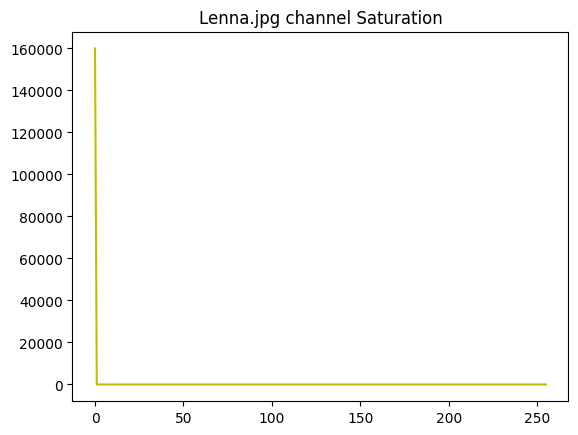

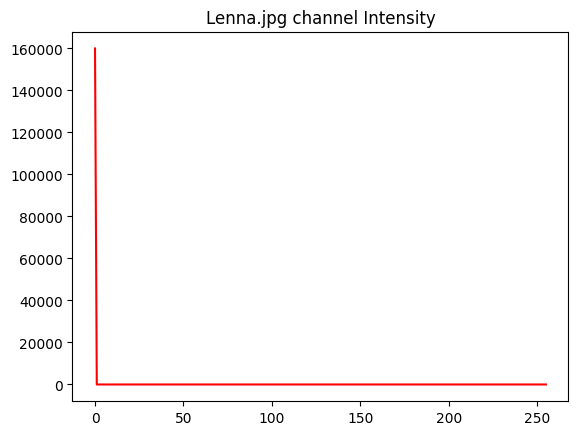

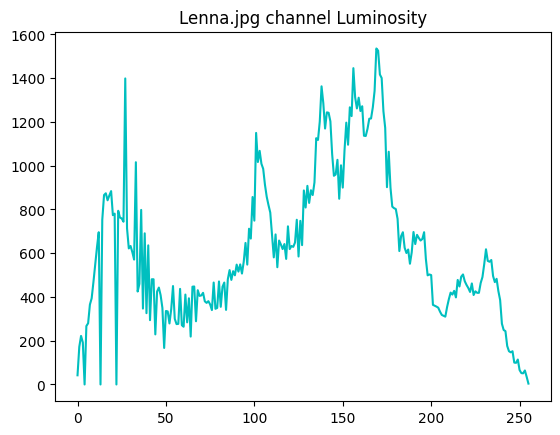

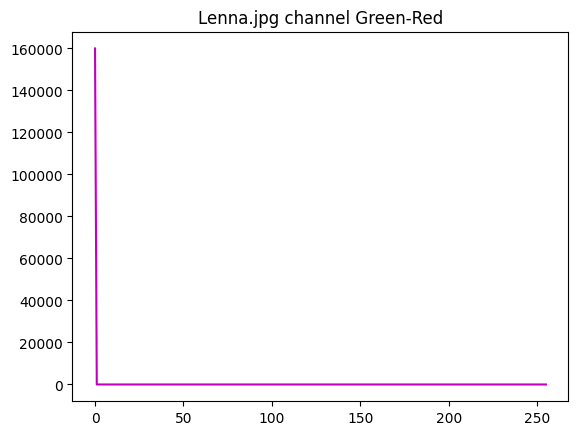

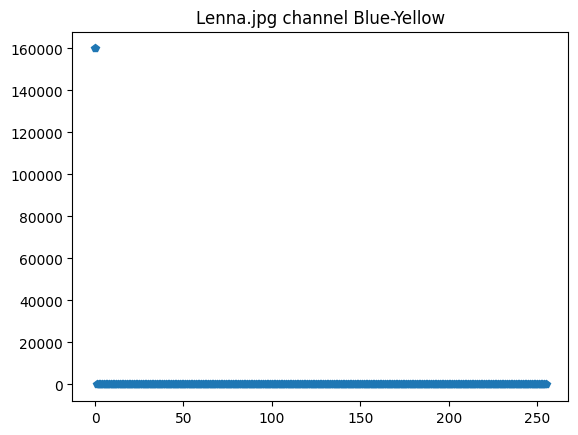

In [3]:
img1 = CvImage(name = "image.jpg")
img1RGB = img1.cvtColor(cv2.COLOR_BGR2RGB)
img1HSV = img1.cvtColor(cv2.COLOR_BGR2HSV)
img1LAB = img1.cvtColor(cv2.COLOR_BGR2LAB)

img2 = CvImage(name = "image2.jpg")
img2RGB = img2.cvtColor(cv2.COLOR_BGR2RGB)
img2HSV = img2.cvtColor(cv2.COLOR_BGR2HSV)
img2LAB = img2.cvtColor(cv2.COLOR_BGR2LAB)

img3 = CvImage(name = "Lenna.jpg")
img3RGB = img3.cvtColor(cv2.COLOR_BGR2RGB)
img3HSV = img3.cvtColor(cv2.COLOR_BGR2HSV)
img3LAB = img3.cvtColor(cv2.COLOR_BGR2LAB)

def getLABChannels(image):
    (L, A, B) = cv2.split(image)
    zeros = np.zeros(image.shape[:2], dtype="uint8")

    ch1 = cv2.merge([L, zeros, zeros])
    ch2 = cv2.merge([zeros, A, zeros])
    ch3 = cv2.merge([zeros, zeros, B])
    
    return (ch1, ch2, ch3)

def plotLABChannelsHist(image):
    channels = getLABChannels(image.image)
    channelNames = ['Luminosity', 'Green-Red', 'Blue-Yellow']
    lineColors = ['c', 'm', 'p']
    
    hists = [ cv2.calcHist([channel], [0], None, [256], [0,256]) for channel in channels ]
        
    for i in range(len(channels)):
        plothist(hists[i], color = lineColors[i], title=str(image) + ' channel ' + channelNames[i])

def getHSVChannels(image):
    (H, S, V) = cv2.split(image)
    zeros = np.zeros(image.shape[:2], dtype="uint8")

    ch1 = cv2.merge([H, zeros, zeros])
    ch2 = cv2.merge([zeros, S, zeros])
    ch3 = cv2.merge([zeros, zeros, V])
    
    return (ch1, ch2, ch3)

def plotHSVChannelsHist(image):
    channels = getHSVChannels(image.image)
    channelNames = ['Hue', 'Saturation', 'Intensity']
    lineColors = ['k', 'y', 'r']
    
    hists = [ cv2.calcHist([channel], [0], None, [256], [0,256]) for channel in channels ]
        
    for i in range(len(channels)):
        plothist(hists[i], color = lineColors[i], title=str(image) + ' channel ' + channelNames[i])

def getRGBChannels(image):
    (B, G, R) = cv2.split(image)
    zeros = np.zeros(image.shape[:2], dtype="uint8")

    ch1 = cv2.merge([zeros, zeros, R])
    ch2 = cv2.merge([zeros, G, zeros])
    ch3 = cv2.merge([B, zeros, zeros])
    
    return (ch1, ch2, ch3)

def plotRGBChannelsHist(image):
    channels = getRGBChannels(image.image)
    channelNames = ['Red', 'Green', 'Blue']
    lineColors = ['r', 'g', 'b']
    
    hists = [ cv2.calcHist([channel], [0], None, [256], [0,256]) for channel in channels ]
        
    for i in range(len(channels)):
        plothist(hists[i], color=lineColors[i], title=str(image) + ' channel ' + channelNames[i])
    
    
# showImageList(getRGBChannels(img1RGB))
# showImageList(getRGBChannels(img2RGB))
# showImageList(getRGBChannels(img3RGB))

showImages(getRGBChannels(img1RGB.image), 'viridis')
plotRGBChannelsHist(img1RGB)
plotHSVChannelsHist(img1HSV)
plotLABChannelsHist(img1LAB)

showImages(getRGBChannels(img2RGB.image), 'viridis')
plotRGBChannelsHist(img2RGB)
plotHSVChannelsHist(img2HSV)
plotLABChannelsHist(img2LAB)

showImages(getRGBChannels(img3RGB.image), 'viridis')
plotRGBChannelsHist(img3RGB)
plotHSVChannelsHist(img3HSV)
plotLABChannelsHist(img3LAB)




2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

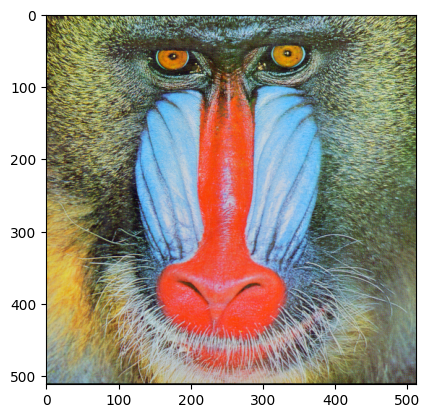

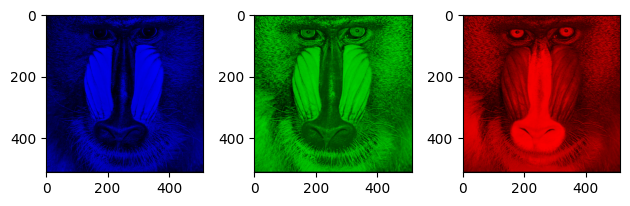

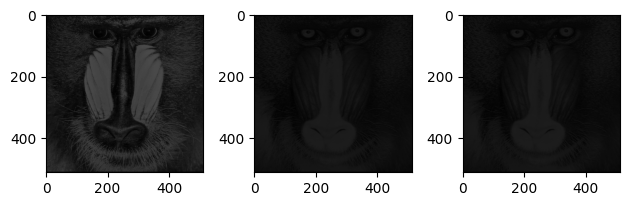

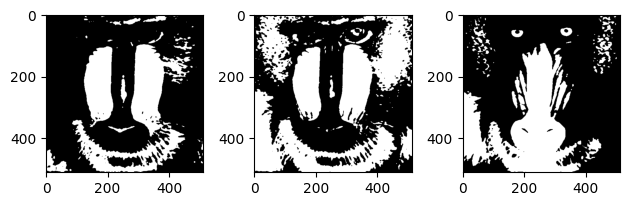

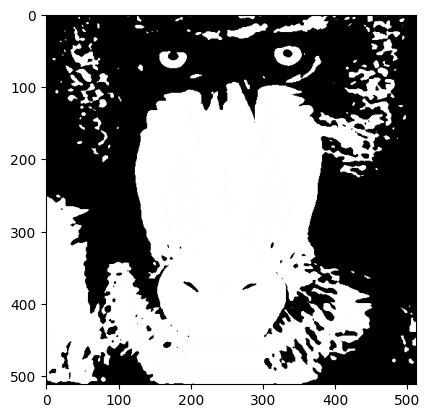

In [50]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)
plt.imshow(img_mand_RGB);

(channelR, channelG, channelB) = getRGBChannels(img_mand)
showImages((channelR, channelG, channelB), 'viridis')

channelRGray = cv2.cvtColor(channelR, cv2.COLOR_BGR2GRAY)
channelGGray = cv2.cvtColor(channelG, cv2.COLOR_BGR2GRAY)
channelBGray = cv2.cvtColor(channelB, cv2.COLOR_BGR2GRAY)

showImages((channelRGray, channelBGray, channelBGray))

channelRGrayBlur = cv2.GaussianBlur(src=channelRGray, ksize=(11, 11), sigmaX=0)
channelGGrayBlur = cv2.GaussianBlur(src=channelGGray, ksize=(11, 11), sigmaX=0)
channelBGrayBlur = cv2.GaussianBlur(src=channelBGray, ksize=(11, 11), sigmaX=0)

retR, thR = cv2.threshold(channelRGrayBlur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
retG, thG = cv2.threshold(channelGGrayBlur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
retB, thB = cv2.threshold(channelBGrayBlur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

showImages((thR, thG, thB))

showImage(thR + thB)

3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

error: OpenCV(4.5.4) ./modules/imgproc/src/thresh.cpp:1557: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 6 (CV_64FC1)


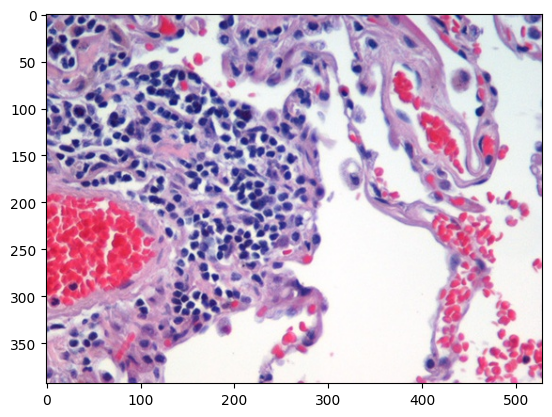

In [10]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
plt.imshow(img_he_RGB);

(channelR, channelG, channelB) = getRGBChannels(img_he_RGB)

channelBGray = cv2.cvtColor(channelB, cv2.COLOR_BGR2GRAY)
channelBSobel = cv2.Sobel(channelBGray, cv2.CV_16UC1, 1, 0, ksize=5)

retB, thB = cv2.threshold(channelBSobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

showImage(thB, 'viridis')
showImage(channelR, 'viridis')
showImage(channelG, 'viridis')
showImage(channelB, 'viridis')